In [1]:
from ActivePyTools.grab_data import eval_object_columns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import chardet

crop_path = '../docs/crop_pics/google/'
project_root = '../'

def get_picture_path(relative_path):
    return project_root + relative_path

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def grab_df_data(df_path):
    with open(df_path, 'rb') as file:
        encoding = chardet.detect(file.read())['encoding']

    temp_df = pd.read_csv(df_path, encoding=encoding)
    df = eval_object_columns(temp_df)
    return df

# Use Location Data

## Load Data

In [3]:
loc_df = grab_df_data('../data/digit_data/loc_df.csv')
loc_df['label'] = loc_df['label'].astype(int)
loc_df['idx'] = loc_df['idx'].astype(int)

## Prepare Data

In [4]:
X_loc_train = loc_df[loc_df['type']=='train'].drop(columns=['label', 'idx', 'type'])
y_loc_train = loc_df[loc_df['type']=='train']['label']
X_loc_valid = loc_df[loc_df['type']=='valid'].drop(columns=['label', 'idx', 'type'])
y_loc_valid = loc_df[loc_df['type']=='valid']['label']
X_loc_test = loc_df[loc_df['type']=='test'].drop(columns=['label', 'idx', 'type'])
y_loc_test = loc_df[loc_df['type']=='test']['label']

## Train

In [5]:
model_loc = LogisticRegression(max_iter=10000)  # max_iter may be set higher if convergence issues occur

model_loc.fit(X_loc_train, y_loc_train);

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def apply_metric(model, X, y_actual, threshold, enable_print = False):
    probabilities = model.predict_proba(X)[:, 1]
    y_pred = (probabilities >= threshold).astype(int)
    
    cm = confusion_matrix(y_pred, y_actual)
    TN = cm[0, 0]
    FP = cm[0, 1]
    
    precision = precision_score(y_pred, y_actual)
    recall = recall_score(y_pred, y_actual)
    specificity = TN / (TN + FP)
    accuracy = accuracy_score(y_pred, y_actual)
    
    if enable_print:
        print(f"CM: \n{cm}")
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'Specificity: {specificity:.2f}')
        print(f'Accuracy: {accuracy:.2f}')
    
    return precision, recall, specificity, cm

## Tune Hyperparameter

In [7]:
precisions_1, recalls_1, specificities_1 = [], [], []
precisions_2, recalls_2, specificities_2 = [], [], []
rang = np.arange(0.1, 0.71, 0.01)

for th in rang:
    prec1, recal1, spec1, _ = apply_metric(model_loc, X_loc_test, y_loc_test, th)
    prec2, recal2, spec2, _ = apply_metric(model_loc, X_loc_valid, y_loc_valid, th)
    precisions_1.append(prec1)
    recalls_1.append(recal1)
    specificities_1.append(spec1)
    precisions_2.append(prec2)
    recalls_2.append(recal2)
    specificities_2.append(spec2)

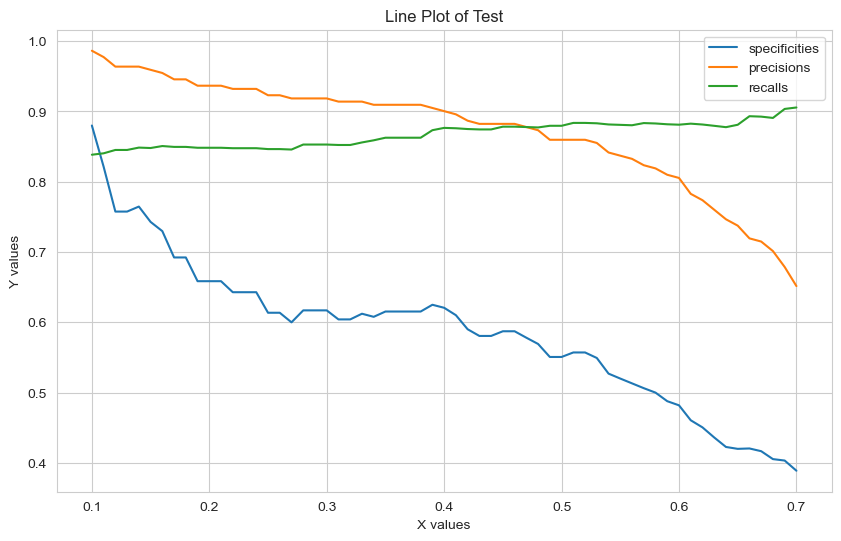

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_1, label='specificities')
plt.plot(rang, precisions_1, label='precisions')
plt.plot(rang, recalls_1, label='recalls')

plt.title('Line Plot of Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

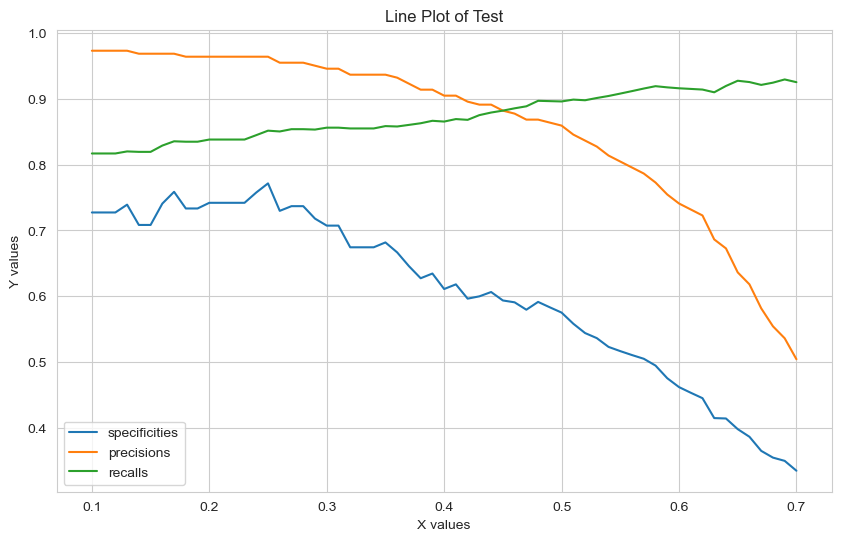

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_2, label='specificities')
plt.plot(rang, precisions_2, label='precisions')
plt.plot(rang, recalls_2, label='recalls')

plt.title('Line Plot of Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

## Measure Performance

In [10]:
print("Test Set\n")
apply_metric(model_loc, X_loc_test, y_loc_test, 0.42, True)
print("\nValidation Set\n")
cm1 = apply_metric(model_loc, X_loc_valid, y_loc_valid, 0.42, True)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm1, annot=True, fmt="d", cmap='Blues', square=True)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

Test Set

CM: 
[[ 36  25]
 [ 28 196]]
Precision: 0.89
Recall: 0.88
Specificity: 0.59
Accuracy: 0.81

Validation Set

CM: 
[[ 34  23]
 [ 30 197]]
Precision: 0.90
Recall: 0.87
Specificity: 0.60
Accuracy: 0.81


# Use Text Vector

## Load Data

In [11]:
vec_df = grab_df_data('../data/digit_data/vec_df.csv')
vec_df['label'] = vec_df['label'].astype(int)
vec_df['idx'] = vec_df['idx'].astype(int)

## Prepare Data

In [12]:
X_vec_train = vec_df[vec_df['type']=='train'].drop(columns=['label', 'idx', 'type'])
y_vec_train = vec_df[vec_df['type']=='train']['label']
X_vec_valid = vec_df[vec_df['type']=='valid'].drop(columns=['label', 'idx', 'type'])
y_vec_valid = vec_df[vec_df['type']=='valid']['label']
X_vec_test = vec_df[vec_df['type']=='test'].drop(columns=['label', 'idx', 'type'])
y_vec_test = vec_df[vec_df['type']=='test']['label']

## Train

In [13]:
model_vec = LogisticRegression(max_iter=10000)

model_vec.fit(X_vec_train, y_vec_train);

## Tune Hyperparameter

In [14]:
precisions_1, recalls_1, specificities_1 = [], [], []
precisions_2, recalls_2, specificities_2 = [], [], []
rang = np.arange(0.1, 0.71, 0.01)

for th in rang:
    prec1, recal1, spec1, _ = apply_metric(model_vec, X_vec_test, y_vec_test, th)
    prec2, recal2, spec2, _ = apply_metric(model_vec, X_vec_valid, y_vec_valid, th)
    precisions_1.append(prec1)
    recalls_1.append(recal1)
    specificities_1.append(spec1)
    precisions_2.append(prec2)
    recalls_2.append(recal2)
    specificities_2.append(spec2)

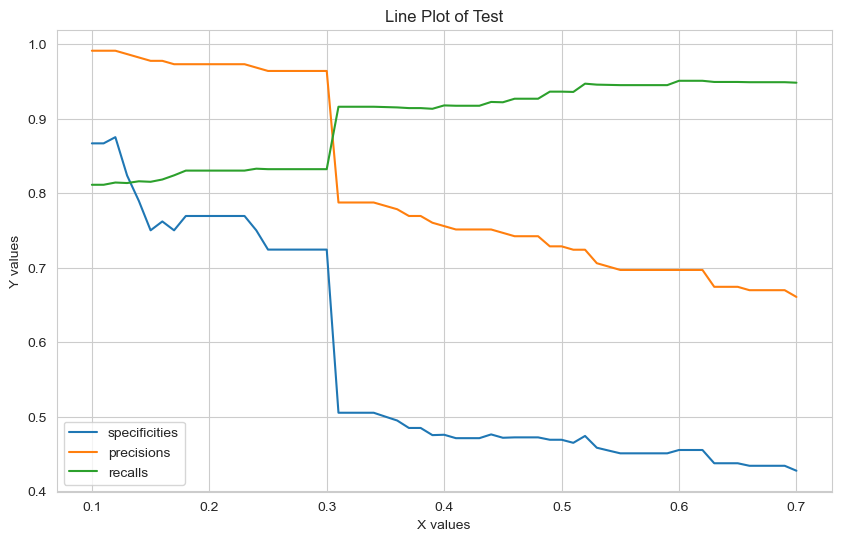

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_1, label='specificities')
plt.plot(rang, precisions_1, label='precisions')
plt.plot(rang, recalls_1, label='recalls')

plt.title('Line Plot of Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

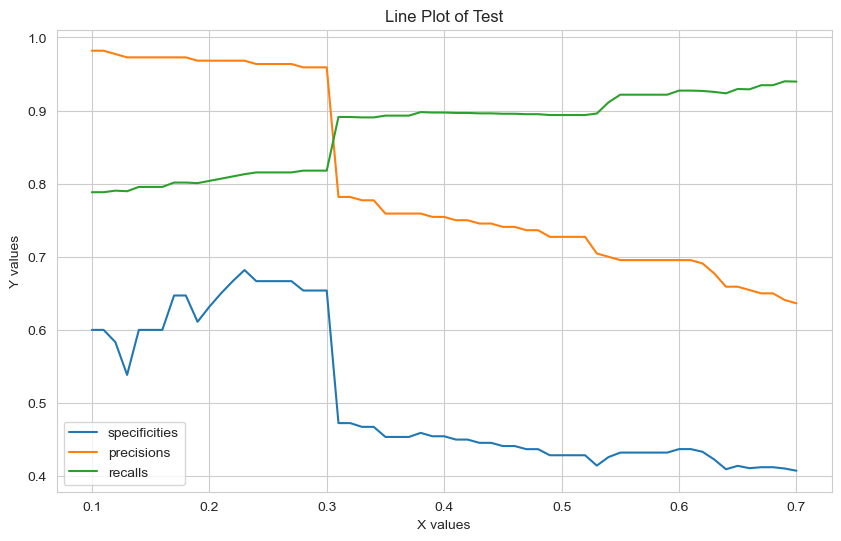

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(rang, specificities_2, label='specificities')
plt.plot(rang, precisions_2, label='precisions')
plt.plot(rang, recalls_2, label='recalls')

plt.title('Line Plot of Test')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()

plt.grid(True)
plt.show()

## Measure Performance

In [17]:
print("Test Set\n")
apply_metric(model_vec, X_vec_test, y_vec_test, 0.42, True)
print("\nValidation Set\n")
cm1 = apply_metric(model_vec, X_vec_valid, y_vec_valid, 0.42, True)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm1, annot=True, fmt="d", cmap='Blues', square=True)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

Test Set

CM: 
[[ 49  55]
 [ 15 166]]
Precision: 0.75
Recall: 0.92
Specificity: 0.47
Accuracy: 0.75

Validation Set

CM: 
[[ 45  55]
 [ 19 165]]
Precision: 0.75
Recall: 0.90
Specificity: 0.45
Accuracy: 0.74


# Ensemble

In [18]:
val_preds1 = model_loc.predict_proba(X_loc_train)[:, 1]
val_preds2 = model_vec.predict_proba(X_vec_train)[:, 1]

stacked_features = np.column_stack((val_preds1, val_preds2))

In [19]:
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression()
meta_model.fit(stacked_features, y_loc_train);

In [20]:
test_preds1 = model_loc.predict_proba(X_loc_test)[:, 1]
test_preds2 = model_vec.predict_proba(X_vec_test)[:, 1]
test_x  = np.column_stack((test_preds1, test_preds2))

test_pred = meta_model.predict(test_x)

accuracy = accuracy_score(y_loc_test, test_pred)
cm = confusion_matrix(y_loc_test, test_pred)
precision = precision_score(y_loc_test, test_pred)
recall = recall_score(y_loc_test, test_pred)

TN = cm[0, 0]
FP = cm[0, 1]
specificity = TN / (TN + FP)

print(f"CM: \n{cm}")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}')

CM: 
[[ 46  18]
 [ 34 187]]
Precision: 0.91
Recall: 0.85
Specificity: 0.72
Accuracy: 0.82


In [21]:
valid_preds1 = model_loc.predict_proba(X_loc_valid)[:, 1]
valid_preds2 = model_vec.predict_proba(X_vec_valid)[:, 1]
valid_x  = np.column_stack((valid_preds1, valid_preds2))

valid_pred = meta_model.predict(valid_x)

accuracy = accuracy_score(y_loc_valid, valid_pred)
cm = confusion_matrix(y_loc_valid, valid_pred)
precision = precision_score(y_loc_valid, valid_pred)
recall = recall_score(y_loc_valid, valid_pred)

TN = cm[0, 0]
FP = cm[0, 1]
specificity = TN / (TN + FP)

print(f"CM: \n{cm}")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}')

CM: 
[[ 47  17]
 [ 45 175]]
Precision: 0.91
Recall: 0.80
Specificity: 0.73
Accuracy: 0.78


# Store

In [22]:
from joblib import dump, load

dump(model_loc, 'location_logistic_regression.joblib')
dump(model_vec, 'vector_logistic_regression.joblib')
dump(meta_model, 'combined_logistic_regression.joblib')

['combined_logistic_regression.joblib']

# Example for using the Model

In [23]:
from LR_func import CustomLRModel
from model_utils import *
loc_df, X_loc_train, y_loc_train, X_loc_valid, y_loc_valid, X_loc_test, y_loc_test = load_loc_data('../')
vec_df, X_vec_train, y_vec_train, X_vec_valid, y_vec_valid, X_vec_test, y_vec_test = load_vec_data('../')

mod = CustomLRModel.load_model('./')

In [24]:
valid_pred = mod.predict(X_loc_valid, X_vec_valid)
measure_performance(valid_pred, y_loc_valid)

TypeError: measure_performance() missing 2 required positional arguments: 'y' and 'preds'

In [ ]:
test_pred = mod.predict(X_loc_test, X_vec_test)
measure_performance(test_pred, y_loc_test)